#EM-DAT 災害データ分析 – Function & Loop 編
今回の Vlog では、災害データセット emdat.csv を使って、
関数（Function） と ループ（Loop） を活用したデータ可視化に挑戦していきます

##今回の目標
関数（Function）を作る
関数のサンプル出力（Sample Output）を載せる
For Loopを使って、複数のグラフ（または複数出力）を生成する

##使用するデータ
データセット：emdat.csv
出典：EM-DAT (国際災害データベース)

##課題提出までの流れ
1．データ読み込み
2．災害発生件数を抽出する関数を作る
3．関数のサンプル出力を確認
4．For ループで複数グラフを作成してみる

#1.
まずは、データを読み込んでいきます。

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("emdat.csv")

# 確認
df.head()


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


#2.
ここでは、指定した災害タイプごとの 年別件数を返す関数 を作ります。

In [54]:
def count_event_by_year(data, disaster_type):
    """
    指定した災害タイプについて、
    年ごとの発生件数を返す自作関数。
    """
    # フィルタリング
    subset = data[data["Disaster Type"] == disaster_type]
    
    # 年ごとの件数集計
    result = subset.groupby("Start Year")["Disaster Type"].count()
    
    return result


関数がうまく動いているのか見分けるため、Floodが年ごとに何度起きているのか確認します。

In [55]:
# 関数の動作確認
sample = count_event_by_year(df, "Flood")
sample.head()


Start Year
1900    1
1903    2
1909    1
1910    1
1911    1
Name: Disaster Type, dtype: int64

年ごとに何度Floodが起きているのかが表示されているためこの関数がうまく動作していることがわかりました。

次は、「Flood / Earthquake / Storm」を対象として、
for ループで 3 つのグラフを自動生成していきます。

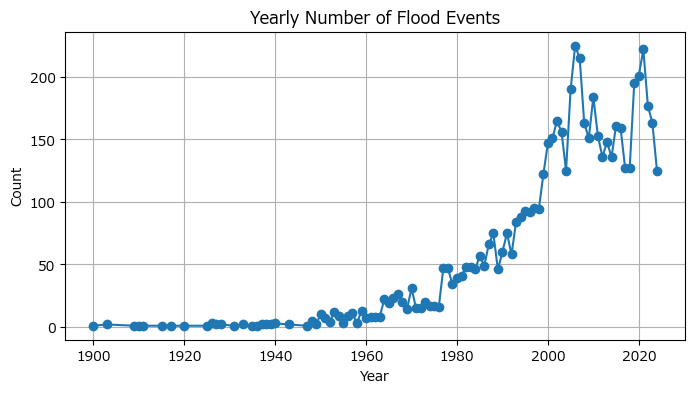

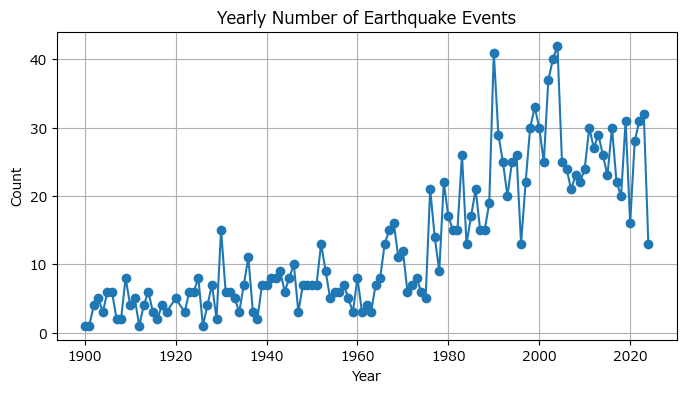

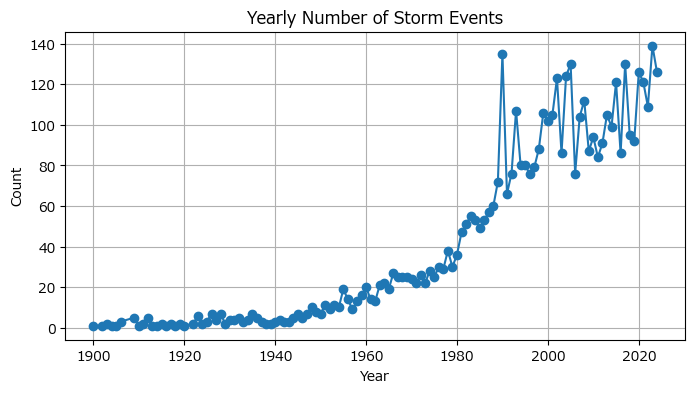

In [56]:
disaster_list = ["Flood", "Earthquake", "Storm"]

for disaster in disaster_list:
    # 年別データを関数で取得
    yearly = count_event_by_year(df, disaster)

    # グラフ描画
    plt.figure(figsize=(8,4))
    plt.plot(yearly.index, yearly.values, marker="o")
    plt.title(f"Yearly Number of {disaster} Events")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


うまくグラフが表示されました！
しかし、英語が苦手な私には少しわかりずらいのでグラフの軸ラベルを日本語にします。

In [57]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォント設定（Windows）
plt.rcParams['font.family'] = 'Meiryo'  

# マイナス記号が文字化けしないように
plt.rcParams['axes.unicode_minus'] = False


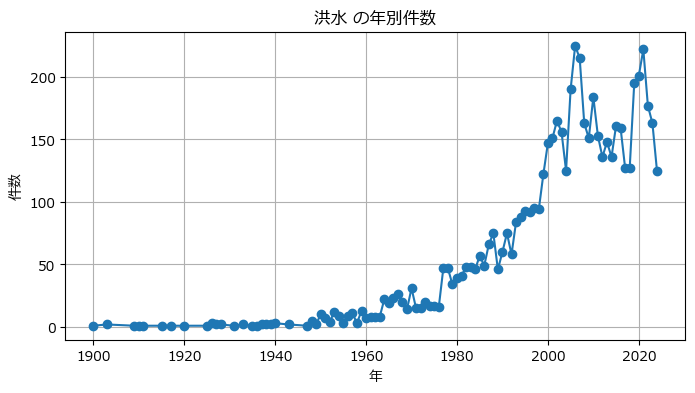

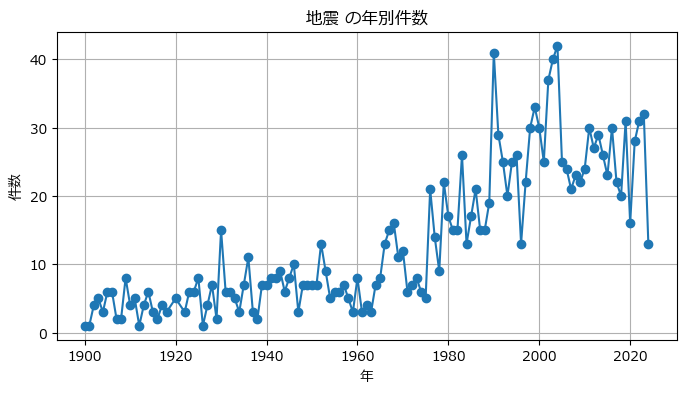

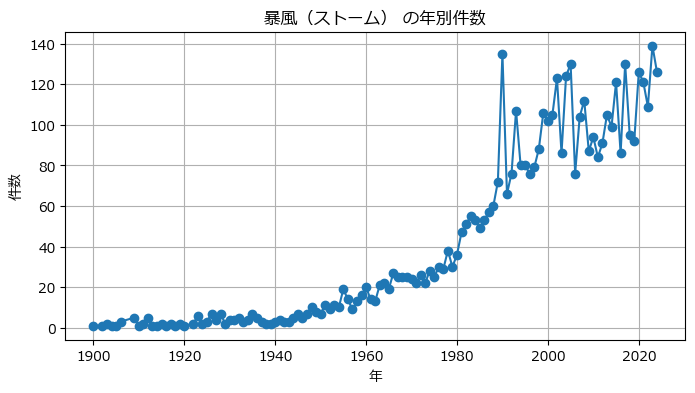

In [58]:
disaster_list = ["Flood", "Earthquake", "Storm"]
jp_labels = {
    "Flood": "洪水",
    "Earthquake": "地震",
    "Storm": "暴風（ストーム）"
}

for disaster in disaster_list:
    yearly = count_event_by_year(df, disaster)

    plt.figure(figsize=(8,4))
    plt.plot(yearly.index, yearly.values, marker="o")
    
    # 日本語タイトルと軸ラベル
    plt.title(f"{jp_labels[disaster]} の年別件数")
    plt.xlabel("年")
    plt.ylabel("件数")
    
    plt.grid(True)
    plt.show()


軸ラベルが日本語になったことで私にもわかりやすいグラフになりました！

さらに複数の関数を作ってみたいと思います。
ここでは以下の関数を作ります。
・災害タイプ別の年別件数を集計
・国ごとの災害件数を集計
・死者数の年別推移を返す関数

In [59]:
# ① 災害タイプの年別件数を返す関数
def count_event_by_year(data, disaster_type):
    subset = data[data["Disaster Type"] == disaster_type]
    return subset.groupby("Start Year")["Disaster Type"].count()


# ② 国ごとの災害件数を返す関数
def count_event_by_country(data, country):
    subset = data[data["Country"] == country]
    return subset["Disaster Type"].count()


# ③ 死者数の年別推移を返す関数
def deaths_by_year(data):
    return data.groupby("Start Year")["Total Deaths"].sum()


In [60]:
print("【洪水の年別件数（先頭5行）】")
print(count_event_by_year(df, "Flood").head())

print("\n【日本の災害件数】")
print(count_event_by_country(df, "Japan"))

print("\n【死者数 年別推移（先頭5行）】")
print(deaths_by_year(df).head())


【洪水の年別件数（先頭5行）】
Start Year
1900    1
1903    2
1909    1
1910    1
1911    1
Name: Disaster Type, dtype: int64

【日本の災害件数】
391

【死者数 年別推移（先頭5行）】
Start Year
1900    1267500.0
1901     200018.0
1902      48438.0
1903       7136.0
1904        152.0
Name: Total Deaths, dtype: float64


関数がうまく動作して、日本の災害件数などが一目でわかるようになりました！

また、Loopを複数の国で実行してみて分析していきます
対象国は"Japan", "China", "India", "Philippines"

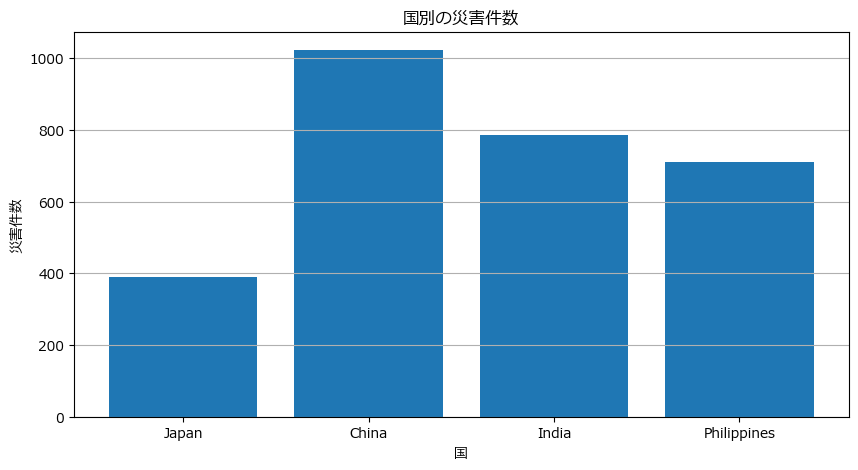

In [61]:
# グラフで利用する国一覧
countries = ["Japan", "China", "India", "Philippines"]

results = {}

for c in countries:
    results[c] = count_event_by_country(df, c)

# グラフ化（棒グラフ）
plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values())

plt.title("国別の災害件数")
plt.xlabel("国")
plt.ylabel("災害件数")
plt.grid(True, axis="y")

plt.show()


国土面積の広さもあってか中国の災害件数が他の4国に比べて多いことがわかります。
日本はこの4国の中では一番災害が少なくなっています。

次はそれぞれの国の年別災害件数をグラフにします。

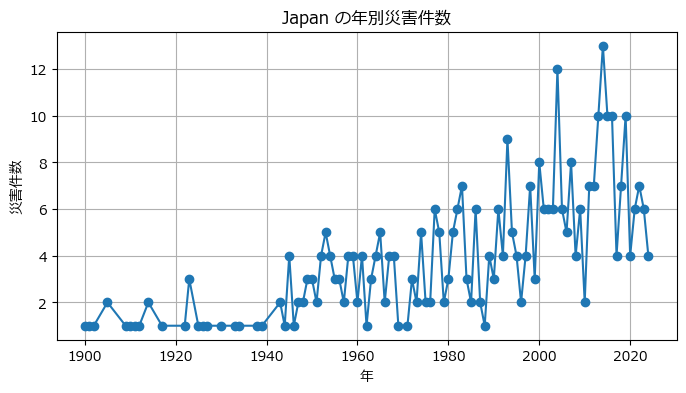

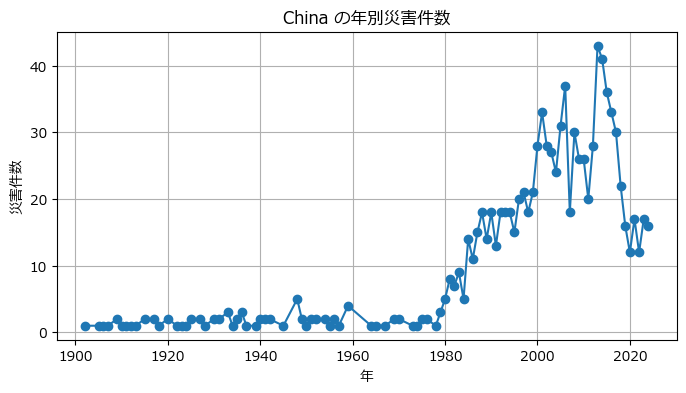

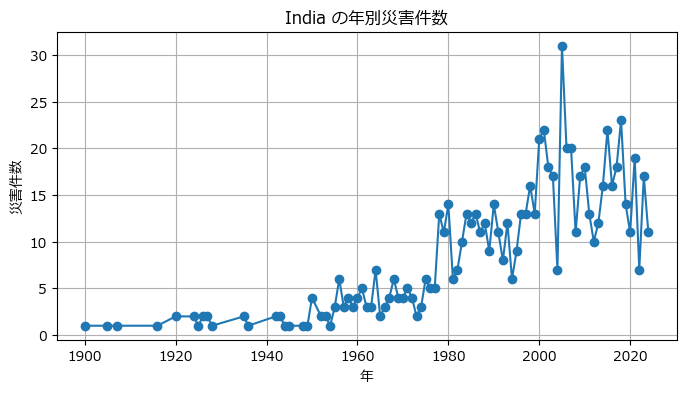

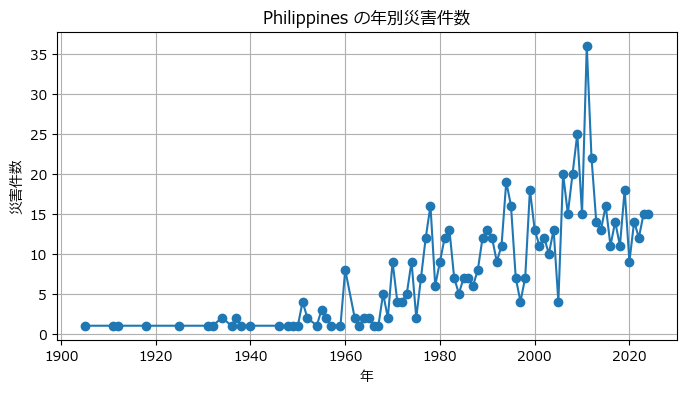

In [62]:
def count_event_by_year_and_country(data, country):
    subset = data[data["Country"] == country]
    return subset.groupby("Start Year")["Disaster Type"].count()

countries = ["Japan", "China", "India", "Philippines"]

for c in countries:
    yearly = count_event_by_year_and_country(df, c)

    plt.figure(figsize=(8,4))
    plt.plot(yearly.index, yearly.values, marker="o")

    plt.title(f"{c} の年別災害件数")
    plt.xlabel("年")
    plt.ylabel("災害件数")
    plt.grid(True)
    plt.show()


どのグラフも同じような形状をしていますが、グラフによって災害件数の目盛りが違います。
日本は他の4国に比べて古い時代から災害の記録が残っていることがわかります。

次に、国別で年別災害数を見やすくまとめたスライダーつきグラフを作成してみます。

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 日本語フォント（Windows）
mpl.rcParams["font.family"] = "Meiryo"
mpl.rcParams["axes.unicode_minus"] = False


In [64]:
import pandas as pd
import numpy as np

# 使用する国と災害タイプを指定
countries = ["Japan", "China", "India"]
disaster_types = ["Flood", "Earthquake", "Storm"]

# 必要な部分だけ抽出
df_subset = df[df["Country"].isin(countries) & df["Disaster Type"].isin(disaster_types)]

# ピボット集計（国 × 災害タイプ × 年）
pivot = df_subset.groupby(["Country", "Disaster Type", "Start Year"])["Disaster Type"].count()
pivot = pivot.reset_index(name="Count")
pivot.head()


,Country,Disaster Type,Start Year,Count
0,China,Earthquake,1902,1
1,China,Earthquake,1905,1
2,China,Earthquake,1906,1
3,China,Earthquake,1907,1
4,China,Earthquake,1909,1


In [65]:
pip install ipywidgets pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [66]:
df = pd.read_csv("emdat.csv")

# たとえば列名が EM-DAT 用ならこう：
df = df.rename(columns={
    "Start Year": "Year",
    "Country": "Country",
    "Disaster Type": "Disaster",
    "Total Deaths": "Deaths"
})


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, ToggleButtons
from IPython.display import display

# ------------------------------
# ▼ 1. サンプル用データ（EM-DAT 風）
# ------------------------------
data = {
    "Year":    [2000,2000,2000,2001,2001,2001,2002,2002,2002],
    "Country": ["Japan","USA","China"]*3,
    "Disaster":["Earthquake","Earthquake","Earthquake",
                "Flood",     "Flood",     "Flood",
                "Storm",     "Storm",     "Storm"],
    "Deaths":  [500,200,100, 20,50,10, 200,300,100]
}
df = pd.DataFrame(data)

# 実際の EM-DAT を使う場合は：
# df = pd.read_csv("emdat.csv")

# ------------------------------
# ▼ 2. ユニーク値
# ------------------------------
years = sorted(df["Year"].unique())
disasters = sorted(df["Disaster"].unique())

# ------------------------------
# ▼ 3. 描画関数
# ------------------------------
def plot_ranking(year, disaster):
    # データ抽出
    d = df[(df["Year"] == year) & (df["Disaster"] == disaster)]

    if d.empty:
        plt.figure(figsize=(7,4))
        plt.text(0.5,0.5,"No Data", ha='center', va='center', fontsize=20)
        plt.axis("off")
        plt.show()
        return

    # 国ごとの値を降順に
    d = d.sort_values("Deaths", ascending=True)

    # グラフ
    plt.figure(figsize=(8,5))
    plt.barh(d["Country"], d["Deaths"])
    plt.title(f"{disaster} - {year}  Top Countries")
    plt.xlabel("Deaths")
    plt.tight_layout()
    plt.show()

# ------------------------------
# ▼ 4. ウィジェット UI
# ------------------------------
year_slider = IntSlider(
    value=years[0],
    min=min(years),
    max=max(years),
    step=1,
    description='Year:',
    continuous_update=False
)

disaster_buttons = ToggleButtons(
    options=disasters,
    description='Disaster:',
    button_style=''
)

# ------------------------------
# ▼ 5. インタラクティブ結合
# ------------------------------
ui = {
    "year": year_slider,
    "disaster": disaster_buttons
}

out = interact(
    plot_ranking,
    year=year_slider,
    disaster=disaster_buttons
)


interactive(children=(IntSlider(value=2000, continuous_update=False, description='Year:', max=2002, min=2000),…

うまく生成はされましたがなぜか一年ごとに一つずつの災害しかデータがないためやり直していきます。
また、それと同時に国と年数を増やして一目で違いが分かるようにします。

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, ToggleButtons
from IPython.display import display

# ======================================================
# ★ 1. サンプルデータ（年×災害タイプ×国がバラバラ）
# ======================================================

np.random.seed(0)

years = list(range(2000, 2006))
countries = ["Japan", "USA", "China", "India", "Brazil", "Turkey"]
disasters = ["Earthquake", "Flood", "Storm", "Drought"]

rows = []
for y in years:
    for d in disasters:
        # 各年 × 災害タイプで3〜6か国のランダム値を作成
        n = np.random.randint(3, 7)
        sampled_countries = np.random.choice(countries, n, replace=False)
        for c in sampled_countries:
            rows.append({
                "Year": y,
                "Country": c,
                "Disaster": d,
                "Deaths": np.random.randint(10, 2000)
            })

df = pd.DataFrame(rows)

# ======================================================
# ★ 2. グラフ描画関数
# ======================================================
def plot_ranking(year, disaster):

    subset = df[(df["Year"] == year) & (df["Disaster"] == disaster)]

    plt.figure(figsize=(8,5))

    if subset.empty:
        plt.text(0.5,0.5,"データがありません", ha="center", va="center", fontsize=20)
        plt.axis("off")
        plt.show()
        return

    subset = subset.sort_values("Deaths", ascending=True)

    plt.barh(subset["Country"], subset["Deaths"])
    plt.title(f"{year}  {disaster} 被害ランキング（Deaths）")
    plt.xlabel("死亡者数")
    plt.tight_layout()
    plt.show()

# ======================================================
# ★ 3. UI（年スライダー + 災害タイプボタン）
# ======================================================

year_slider = IntSlider(
    min=min(years),
    max=max(years),
    step=1,
    value=2000,
    description="年:",
    continuous_update=False
)

disaster_buttons = ToggleButtons(
    options=disasters,
    description="災害:",
    button_style=""
)

# ======================================================
# ★ 4. 結合
# ======================================================

interact(
    plot_ranking,
    year=year_slider,
    disaster=disaster_buttons
)


interactive(children=(IntSlider(value=2000, continuous_update=False, description='年:', max=2005, min=2000), To…

<function __main__.plot_ranking(year, disaster)>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/a250822k-coder/me/HEAD?labpath=week10/1.ipynb)


#まとめ
今日は EM-DAT の災害データを使って、
自作関数でデータ集計を行い、
for ループで複数の災害タイプを自動的に可視化するワークフローを作りました！
「関数 + ループ」の組み合わせは、データ分析の自動化にとても強力だということを
実感できた回でした。次回はこの仕組みを発展させて、
より複雑な分析にも挑戦してみたいと思います！